# Predicting Hospital Readmission for Diabetes Patients

## Introduction
The effective management of chronic diseases is a critical challenge in healthcare systems worldwide. Among these chronic conditions, diabetes poses a significant burden on individuals and healthcare providers due to its high prevalence and associated complications. Hospital readmission rates for diabetes patients, particularly within a short time frame, are indicative of suboptimal care coordination, disease management, and patient outcomes.

The ability to accurately predict hospital readmissions for diabetes patients can play a vital role in improving patient care, optimizing healthcare resource allocation, and reducing healthcare costs. By identifying individuals at higher risk of readmission, healthcare providers can implement targeted interventions, timely follow-up care, and personalized treatment plans to minimize the likelihood of readmission and enhance patient outcomes.

In this project, we aim to develop a predictive model using machine learning techniques to forecast hospital readmission for diabetes patients. By analyzing a comprehensive dataset of patient demographics, clinical variables, medications, and encounter information, we will explore the factors that contribute to readmission risk and build a robust predictive model. The project will involve data preprocessing, feature engineering, model selection, and evaluation to create a reliable tool for healthcare professionals to identify patients who may benefit from targeted interventions and proactive care management.

The insights gained from this project have the potential to inform healthcare providers, policymakers, and researchers about the factors influencing hospital readmissions for diabetes patients. By harnessing the power of data-driven approaches, we can enhance the quality of care, optimize resource utilization, and ultimately improve patient outcomes in the management of diabetes.

## Scoping

### Project goals
The goal of this project is to develop a machine learning model that predicts the likelihood of hospital readmission for patients with diabetes. The model can assist healthcare providers in identifying high-risk patients and implementing proactive measures to prevent readmissions, improve patient outcomes, and optimize resource allocation.

### Data
This data comes from UCI Machine Learning Repository, "Diabetes 130-US hospitals for years 1999-2008" by  Clore, Krzysztof Cios, Jon DeShazo, and Beata Strack.

### Analysis
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Also, select relevant features for the prediction model using techniques such as statistical tests, correlation analysis, or domain knowledge to identify the most predictive variables. Apply machine learning algorithms (such as logistic regression, random forest, or gradient boosting) to develop a predictive model for hospital readmission.

### Evaluation
 Evaluate the performance of the model using appropriate evaluation metrics such as accuracy, precision, recall, and area under the ROC curve. Assess the model's ability to correctly predict hospital readmission and its generalizability.

## Import Python Modules

First import the modules being used for this project:

In [185]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

To analyze the the data, `pandas` will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

In [186]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### Data Characteristics

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1.	It is an inpatient encounter (a hospital admission).
2.	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3.	The length of stay was at least 1 day and at most 14 days.
4.	Laboratory tests were performed during the encounter.
5.	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

The columns in the dataset include: 

- **encounter_id:** Unique identifier of an encounter
- **patient_nbr:** Unique identifier of a patient
- **race:** Values: `Caucasian`, `Asian`, `African American`, `Hispanic`, and `other`
- **gender:** Values: `male`, `female`, and `unknown/invalid`
- **age:** Grouped in 10-year intervals: `[0, 10)`, `[10, 20)`,..., `[90, 100)`
- **weight:** Weight in pounds, separated by intervals like `'[0-25)'`, `'[25-50)'`,..., `'>200'`
- **admission_type_id:** Integer identifier corresponding to 9 distinct values, for example, `emergency`, `urgent`, `elective`, `newborn`, and `not available`
- **discharge_disposition_id:** Integer identifier corresponding to 29 distinct values, for example, `discharged to home`, `expired`, and `not available`
- **admission_source_id:** Integer identifier corresponding to 21 distinct values, for example, `physician referral`, `emergency room`, and `transfer from a hospital`
- **time_in_hospital:** Integer number of days between admission and discharge
  
- **payer_code:** Integer identifier corresponding to 23 distinct values, for example, `Blue Cross/Blue Shield`, `Medicare`, and `self-pay`
- **medical_specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, `cardiology`, `internal medicine`, `family/general practice`, and `surgeon`
- **num_lab_procedures:** Number of lab tests performed during the encounter
- **num_procedures:** Number of procedures (other than lab tests) performed during the encounter
- **num_medications:** Number of distinct generic names administered during the encounter
- **number_outpatient:** Number of outpatient visits of the patient in the year preceding the encounter
- **number_emergency:** Number of emergency visits of the patient in the year preceding the encounter
- **number_inpatient:** Number of inpatient visits of the patient in the year preceding the encounter
- **diag_1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **diag_2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- **diag_3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **number_diagnoses:** Number of diagnoses entered to the system
- **max_glu_serum:** Indicates the range of the result or if the test was not taken. Values: `>200`, `>300`, `normal`, and `none` if not measured
- **A1Cresult:** Indicates the range of the result or if the test was not taken. Values: `>8` if the result was greater than 8%, `>7` if the result was greater than 7% but less than 8%, `normal` if the result was less than 7%, and `none` if not measured

For these features, they have the same description:

'The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: `up` if the dosage was increased during the encounter, `down` if the dosage was decreased, `steady` if the dosage did not change, and `no` if the drug was not prescribed'

- **metformin** 
- **repaglinide** 
- **nateglinide**
- **chlorpropamide**
- **glimepiride**
- **acetohexamide**
- **glipizide**
- **glyburide**
- **tolbutamide**
- **pioglitazone**
- **rosiglitazone**
- **acarbose**
- **miglitol**
- **troglitazone**
- **tolazamide**
- **examide**
- **citoglipton**
- **insulin**
- **glyburide.metformin**
- **glipizide.metformin**
- **glimepiride.pioglitazone**
- **metformin.rosiglitazone**
- **metformin.pioglitazone**

(End of identical descriptions)

- **change:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: `change` and `no change`
- **diabetesMed:** Indicates if there was any diabetic medication prescribed. Values: `yes` and `no`
- **readmitted:** Days to inpatient readmission. Values: `<30` if the patient was readmitted in less than 30 days, `>30` if the patient was readmitted in more than 30 days, and `No` for no record of readmission.

This is some additional information on `ID`s for certain features.

**admission_type_id**:
  - 1: Emergency
  - 2: Urgent
  - 3: Elective
  - 4: Newborn
  - 5: Not Available
  - 6: NULL
  - 7: Trauma Center
  - 8: Not Mapped
  
**discharge_disposition_id**
  - 1: Discharged to home
  - 2: Discharged/transferred to another short term hospital
  - 3: Discharged/transferred to SNF
  - 4: Discharged/transferred to ICF
  - 5: Discharged/transferred to another type of inpatient care institution
  - 6: Discharged/transferred to home with home health service
  - 7: Left AMA
  - 8: Discharged/transferred to home under care of Home IV provider
  - 9: Admitted as an inpatient to this hospital
  - 10: Neonate discharged to another hospital for neonatal aftercare
  - 11: Expired
  - 12: Still patient or expected to return for outpatient services
  - 13: Hospice / home
  - 14: Hospice / medical facility
  - 15: Discharged/transferred within this institution to Medicare approved swing bed
  - 16: Discharged/transferred/referred another institution for outpatient services
  - 17: Discharged/transferred/referred to this institution for outpatient services
  - 18: NULL
  - 19: "Expired at home. Medicaid only, hospice."
  - 20: "Expired in a medical facility. Medicaid only, hospice."
  - 21: "Expired, place unknown. Medicaid only, hospice."
  - 22: Discharged/transferred to another rehab fac including rehab units of a hospital.
  - 23: Discharged/transferred to a long term care hospital.
  - 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
  - 25: Not Mapped
  - 26: Unknown/Invalid
  - 27: Discharged/transferred to a federal health care facility.
  - 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
  - 29: Discharged/transferred to a Critical Access Hospital (CAH).
  - 30: Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

**admission_source_id**
  - 1: Physician Referral
  - 2: Clinic Referral
  - 3: HMO Referral
  - 4: Transfer from a hospital
  - 5: Transfer from a Skilled Nursing Facility (SNF)
  - 6: Transfer from another health care facility
  - 7: Emergency Room
  - 8: Court/Law Enforcement
  - 9: Not Available
  - 10: Transfer from critial access hospital
  - 11: Normal Delivery
  - 12: Premature Delivery
  - 13: Sick Baby
  - 14: Extramural Birth
  - 15: Not Available
  - 17: NULL
  - 18: Transfer From Another Home Health Agency
  - 19: Readmission to Same Home Health Agency
  - 20: Not Mapped
  - 21: Unknown/Invalid
  - 22: Transfer from hospital inpt/same fac reslt in a sep claim
  - 23: Born inside this hospital
  - 24: Born outside this hospital
  - 25: Transfer from Ambulatory Surgery Center
  - 26: Transfer from Hospice

## Explore the Data

First we want to look for missing data. We can use `.dtypes()` to return the data types of each column in the DataFrame `df`.

In [188]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

There are a lot of columns with object types which typically represents string values in pandas. This could also indicate a mixture of strings, integers, or NULLs in the columns. Let's check for missing data first using `.isnull()`

In [189]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

There is no missing data values, so it still could be a mixture of strings and integers. Let's take a closer look at the first `object` type column `race`.

In [190]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

Looks to be just strings in here, although later we will address the `'?'` value in the `race` column. Let's try to look at a few more to make sure there isn't anything to take care of.

In [191]:
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [192]:
df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [193]:
df.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [194]:
df.insulin.unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [195]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

Looks to be just strings in `object` labeled columns, although there is `'?'s` for presumptively missing data in place of `NULL`s. 

#### Race and Readmittance

Let's take a peek at some of the relationship between some of these columns with the `'readmitted'` column.

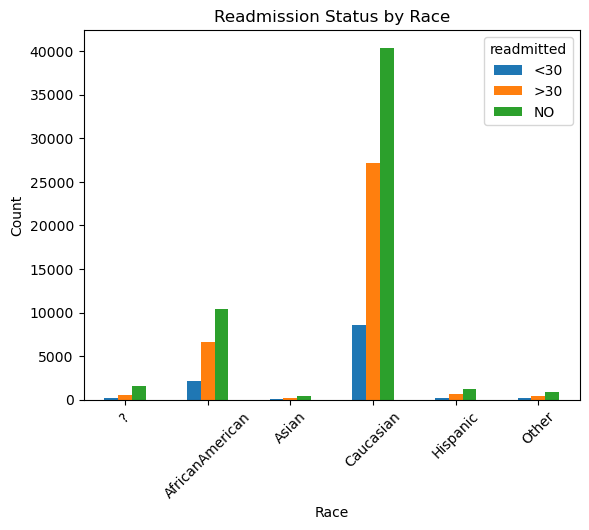

In [196]:
# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Plot the grouped bar plot
race_readmitted.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Readmission Status by Race')

plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder of the keys for `readmitted`:

- `<30` if the patient was readmitted in less than 30 days
- `>30` if the patient was readmitted in more than 30 days
- `NO` for no record of readmission.

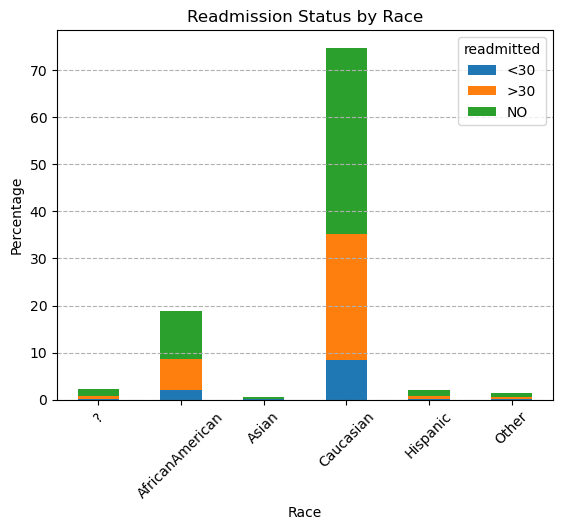

In [197]:
# Calculate the total count of all categories
total_count = df.groupby('readmitted').size().sum()

# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Calculate the overall proportion by dividing each count by the total count of all categories
proportion_race_readmitted = race_readmitted.div(total_count) * 100

# Plot the grouped bar plot
ax = proportion_race_readmitted.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Race')
ax.set_ylabel('Percentage')
ax.set_title('Readmission Status by Race')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add y-axis grids
ax.yaxis.grid(True, linestyle='--', zorder=0)

# Display the plot
plt.show()

Something that seems off is the proportion of `Hispanic` in the Dataset. According to the [U.S. Census July 1, 2022](https://www.census.gov/quickfacts/fact/table/US/PST045222), the `Hispanic` proportion is 19.1%, `Asian` alone is 6.3%, `African American` is 13.6%, and `White` is 58.9%. The discrepancy with this Dataset could be a few things, one being, for example, that people who are both `Hispanic` and `Caucasian` were labeled as just `Caucasian`. Another possibility is that `Hispanic` people are not using healthcare services as much as there counterparts. Another cause could be that `Hispanic` people don't suffer as much with Diabetes compared to other Races, although given the numbers from [diabetes.org](https://diabetes.org/about-us/statistics/about-diabetes), that doesn't seem to be the case. Similar arguments could be made for the `Asian` demographic.

This [article](https://www.kff.org/coronavirus-covid-19/poll-finding/health-and-health-care-experiences-of-hispanic-adults/) might shed some light on the issue. The conclusion is these findings show that, consistent with research from prior to the pandemic, `Hispanic` adults are more likely to be uninsured than their `Caucasian` counterparts. They also are less likely to have a usual source of care other than an emergency room and to rely on community health centers as their source of care.

#### Weight and Readmittance

Let's take a look at weight and readmittance of patients with Diabetes.

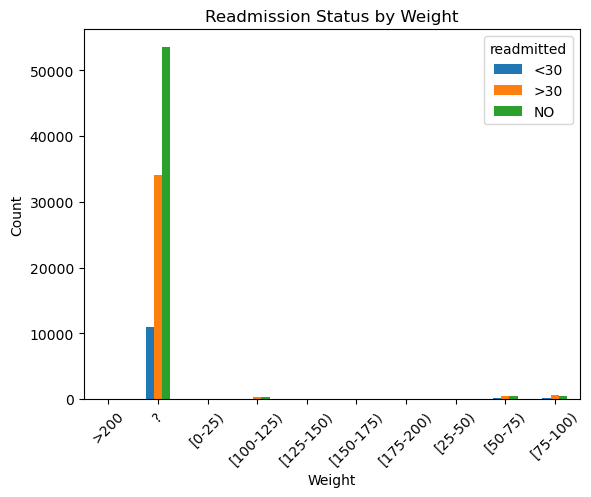

In [198]:
# Setup data for plotting
grouped_cols = df.groupby(['weight', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Readmission Status by Weight')

plt.xticks(rotation=45)

# Display the plot
plt.show()

Just taking a glance, it doesn't seem `weight` was taken to account for most of these admissions. Weight, if measured, could be a indicator for high risk patients. For model creation purposes though, we will exclude `weight` from the rest of the analysis due to lack of data.

#### Gender and Readmittance

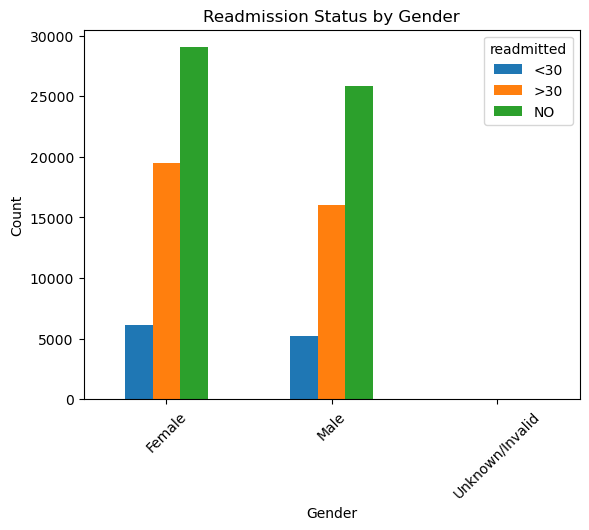

In [199]:
# Setup data for plotting
grouped_cols = df.groupby(['gender', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Readmission Status by Gender')

plt.xticks(rotation=45)

# Display the plot
plt.show()

In [200]:
unknown_count = len(df[df['gender'] == 'Unknown/Invalid'])
print('Unknown count:', unknown_count)

Unknown count: 3


There were only three cases where `gender` was labeled as **Unknown/Invalid**, hence the appearance of the graph. There are more females than male in the dataset, and the distribution for the different readmittance values seem proportionally similar.

#### Age and Readmittance

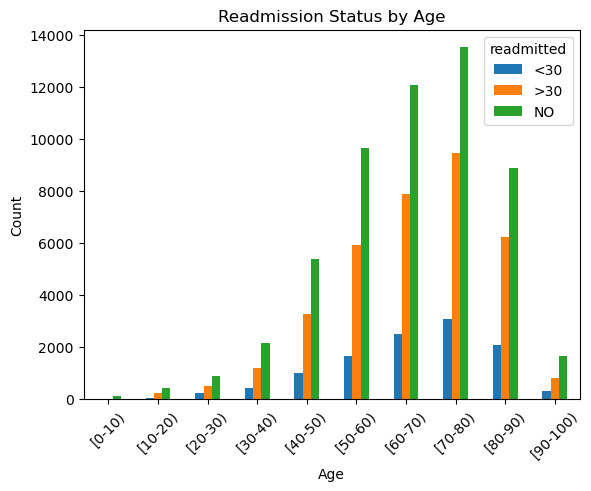

In [201]:
# Setup data for plotting
grouped_cols = df.groupby(['age', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Readmission Status by Age')

plt.xticks(rotation=45)

# Display the plot
plt.show()

This graph shows the distribution of readmittance status versus the age of the patient. Looks like most patients were between the ages 40-90 years old. This seems reasonable since people older than 45 are more likely to develop type 2 diabetes according to [NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)](https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes). 

The average life expectancy in the US between 1999-2008 was ~77 years via [worldbank.org](https://datatopics.worldbank.org/world-development-indicators/). This may explain the sharp decline in overall hospitalization numbers for patients 90+ years old.

#### Time in Hospital and Readmittance

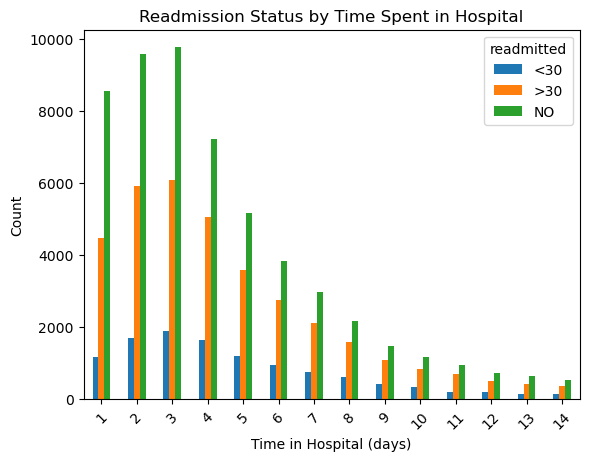

In [202]:
# Setup data for plotting
grouped_cols = df.groupby(['time_in_hospital', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Count')
plt.title('Readmission Status by Time Spent in Hospital')

plt.xticks(rotation=45)

# Display the plot
plt.show()

The distribution for time spent in Hospital and readmittance shows that most patients spend 1-4 days between admission and discharge.

#### Number of Lab Procedures and Readmittance

In [203]:
df_sorted = df.sort_values('num_lab_procedures')
df_sorted.num_lab_procedures.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129,
       132], dtype=int64)

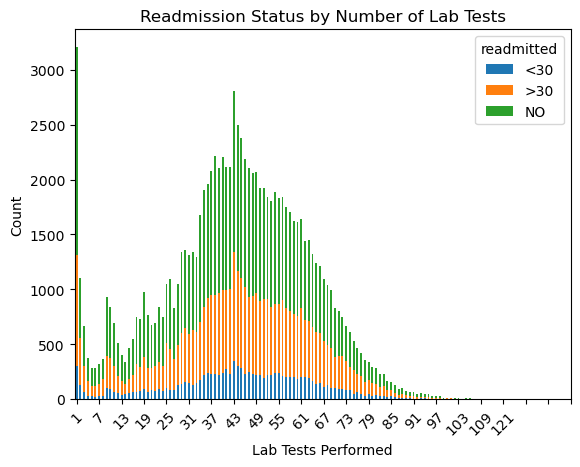

In [204]:
# Setup data for plotting
grouped_cols = df.groupby(['num_lab_procedures', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Lab Tests Performed')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Lab Tests')

# Set the x-axis tick locations and labels
x_ticks = range(0, 133, 6)

plt.xticks(x_ticks, rotation=45)

# Display the plot
plt.show()

This graph shows the distribution between the number of tests done during the encounter and readmittance status. There is a large spike at `1` and most of the distribution landing between ~`35`-`55` lab tests done. 

There is a small spike around `10` as well. These may indicate specific procedures that are dependent in specific Health Institutes. For example, if admitted, do at least one test to figure out what is wrong. Then take `X` amount of tests afterwards depending on what you fine.

#### Number of Procedures and Readmittance

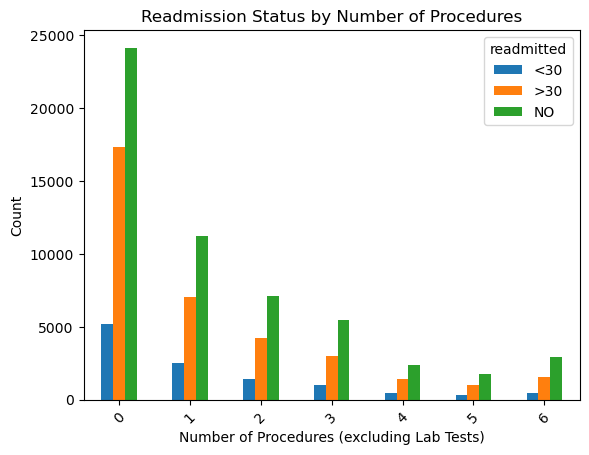

In [205]:
# Setup data for plotting
grouped_cols = df.groupby(['num_procedures', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Procedures (excluding Lab Tests)')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Procedures')

plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot shows the distribution of number of procedures and readmittance. Most patients had `0` procedures done during their admittance.

#### Number of Medications and Readmittance.

In [206]:
df_sorted = df.sort_values('num_medications')
df_sorted.num_medications.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 74, 75, 79, 81], dtype=int64)

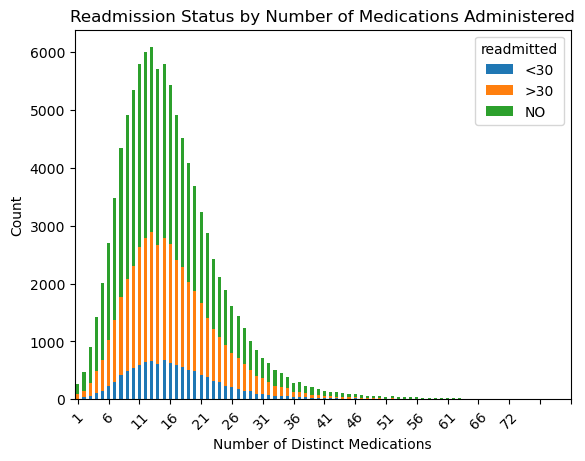

In [207]:
# Setup data for plotting
grouped_cols = df.groupby(['num_medications', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Distinct Medications')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Medications Administered')

# Set the x-axis tick locations and labels
x_ticks = range(0, 82, 5)

plt.xticks(x_ticks, rotation=45)

# Display the plot
plt.show()

This plot shows the distribution of number of distinct generic names administered and readmittance status. Seems most people admitted are given ~`7`-`20` different types of medication.

#### Outpatient, Emergency, and Inpatient visits versus Readmittance

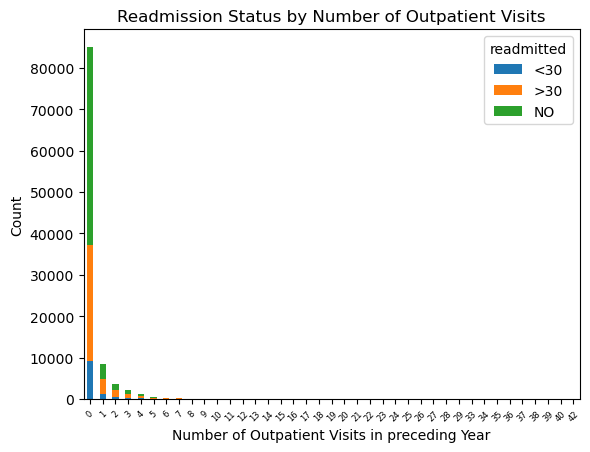

<Figure size 640x480 with 0 Axes>

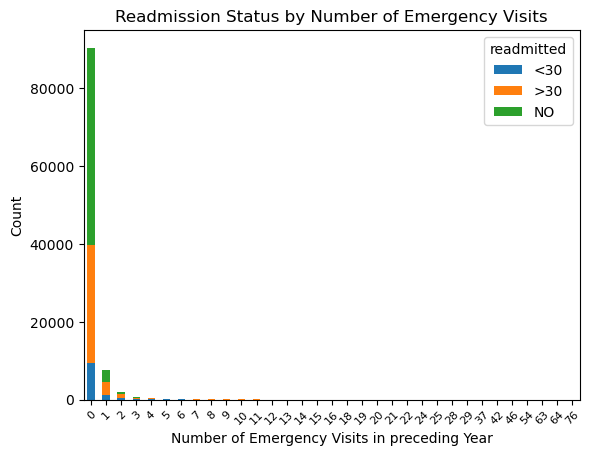

<Figure size 640x480 with 0 Axes>

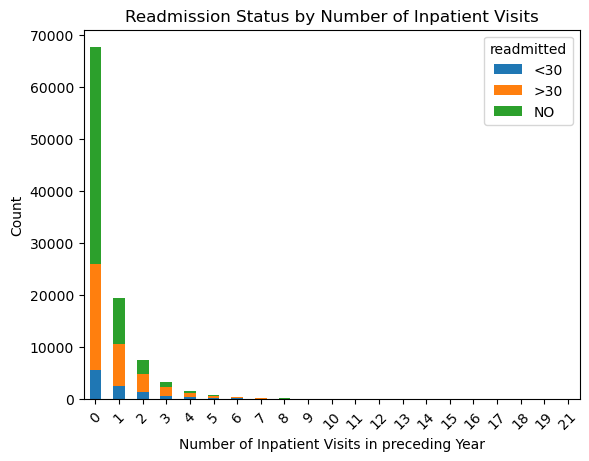

In [208]:
# Setup data for plotting
grouped_cols_1 = df.groupby(['number_outpatient', 'readmitted']).size().unstack()
grouped_cols_2 = df.groupby(['number_emergency', 'readmitted']).size().unstack()
grouped_cols_3 = df.groupby(['number_inpatient', 'readmitted']).size().unstack()

# # Extract unique values from 'number_outpatient' column
# unique_values = df['number_outpatient'].unique()

# # Filter out values greater than 10 and every other value
# filtered_ticks = [str(val) if (val <= 10 or i % 2 != 0) else '' for i, val in enumerate(unique_values)]

# Plot the grouped bar plot
grouped_cols_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Outpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Outpatient Visits')

# # Set the x-axis tick locations and labels
x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
# x_ticks_filtered = [str(int(tick)) if (int(tick) != 0 and int(tick) <= 10) or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
# Set the x-axis tick locations and labels
# plt.xticks(unique_values, filtered_ticks, rotation=0, fontsize=8)
plt.xticks(rotation=45, fontsize=6)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_2.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Emergency Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Emergency Visits')

# # Set the x-axis tick locations and labels
# x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_3.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Inpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Inpatient Visits')

# # Set the x-axis tick locations and labels
# x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Here are multiple plots about various types of visits in the preceding year concerning readmittance status. He appears most people have `0` **Outpatient**, **Emergency**, and **Inpatient** visits the year prior before they are admitted. Let's take a closer look at the smaller values.

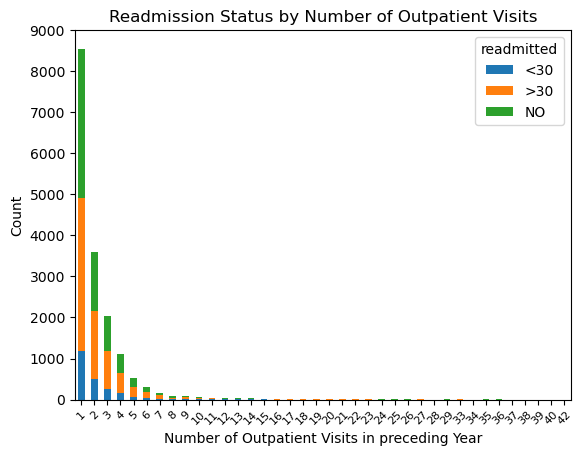

<Figure size 640x480 with 0 Axes>

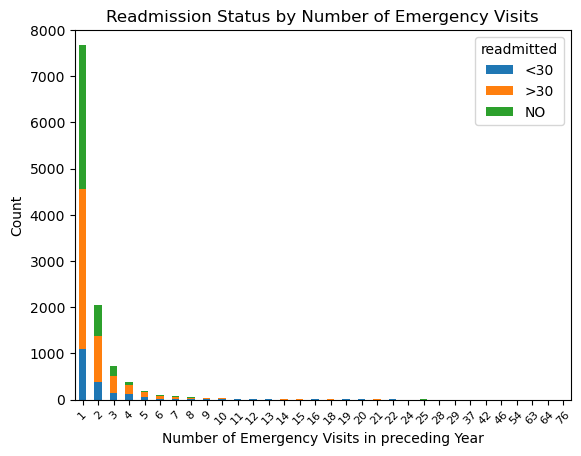

<Figure size 640x480 with 0 Axes>

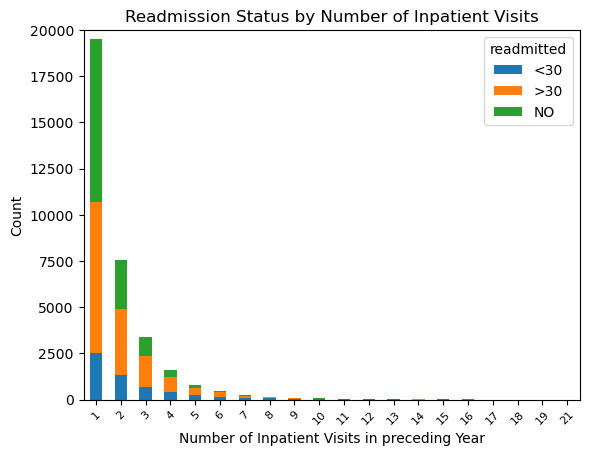

In [209]:
# Setup data for plotting
grouped_cols_1 = df.groupby(['number_outpatient', 'readmitted']).size().unstack()
grouped_cols_2 = df.groupby(['number_emergency', 'readmitted']).size().unstack()
grouped_cols_3 = df.groupby(['number_inpatient', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Outpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Outpatient Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=9000)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_2.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Emergency Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Emergency Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=8000)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_3.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Inpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Inpatient Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=20000)

# Display the plot
plt.show()

We took out the value `0` in each plot to try to get a better look at the smaller values, but as we can see the values are still sharply declining. 

#### Number of Diagnoses and Readmittance

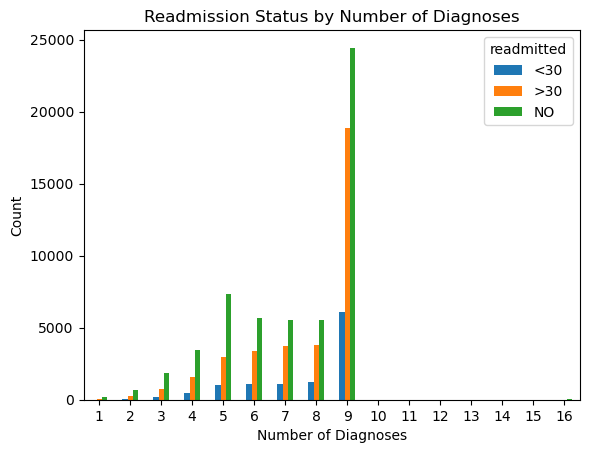

In [210]:
# Setup data for plotting
grouped_cols = df.groupby(['number_diagnoses', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Diagnoses')

# Set the x-axis ticks
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [211]:
# Check amount of patients that may be hard to see above
df['number_diagnoses'].value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

Looking above, we see most people admitted were given `9` diagnoses. Very rarely were people given more than `9` diagnoses (~100 compared to ~101000 patients). Looking at the values `6`-`9`, it appears the readmission after 30 days is higher proportionally compared to `5` and lower. Let's try to take a closer look.

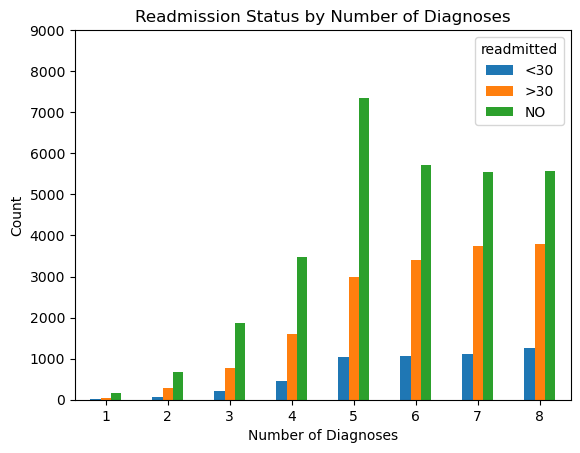

In [212]:
# Setup data for plotting
grouped_cols = df.groupby(['number_diagnoses', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Diagnoses')

# Set the x-axis ticks
plt.xticks(rotation=0)

# Set the x-axis limits to exclude 0
plt.xlim(xmax=7.5)

# Set the y-axis limits
plt.ylim(ymax=9000)

# Display the plot
plt.show()

It does seem that readmittance after 30 days increases proportionally after more than `5` diagnoses have been entered into the system for the admitted patient. We can try to look at the codes for the diagnoses entered to get more of an idea what's going on.

#### Diagnoses Code and Readmittance

In [213]:
diag_1_counts = df['diag_1'].value_counts()
print(diag_1_counts.head(20))

428      6862
414      6581
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
599      1595
584      1520
V57      1207
250.6    1183
518      1115
Name: diag_1, dtype: int64


In [214]:
df['diag_1'].nunique()

717

In [215]:
df_sorted = df.sort_values('diag_1')
df_sorted.diag_1.unique()

array(['10', '11', '110', '112', '114', '115', '117', '131', '133', '135',
       '136', '141', '142', '143', '145', '146', '147', '148', '149',
       '150', '151', '152', '153', '154', '155', '156', '157', '158',
       '160', '161', '162', '163', '164', '170', '171', '172', '173',
       '174', '175', '179', '180', '182', '183', '184', '185', '187',
       '188', '189', '191', '192', '193', '194', '195', '196', '197',
       '198', '199', '200', '201', '202', '203', '204', '205', '207',
       '208', '210', '211', '212', '214', '215', '216', '217', '218',
       '219', '220', '223', '225', '226', '227', '228', '229', '23',
       '230', '233', '235', '236', '237', '238', '239', '240', '241',
       '242', '244', '245', '246', '250', '250.01', '250.02', '250.03',
       '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22',
       '250.23', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41',
       '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6',

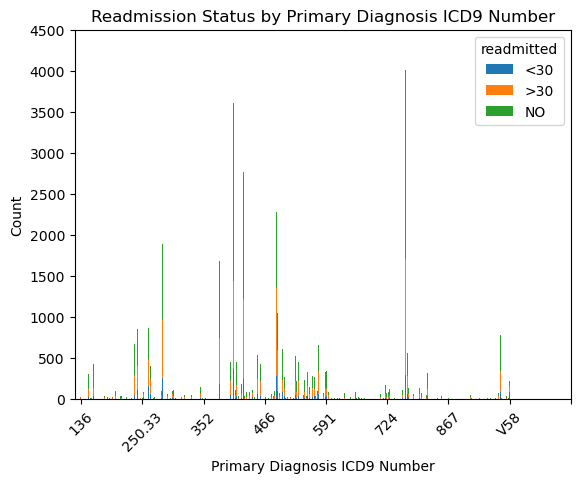

In [216]:
# Setup data for plotting
grouped_cols = df.groupby(['diag_1', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Primary Diagnosis ICD9 Number')
plt.ylabel('Count')
plt.title('Readmission Status by Primary Diagnosis ICD9 Number')

# Set the x-axis ticks
# x_ticks = sorted([428, 414, 786, 410, 486, 427, 491, 715, 682, 434, 780, 996, 276, 38])
x_ticks = range(10, 900, 100)
plt.xticks(x_ticks, rotation=45)

# Set the y-axis limits
plt.ylim(ymax=4500)

# Display the plot
plt.show()

There's a bit to go through here. As a reminder, `diag_1` contains the primary diagnosis (coded as first three digits of [ICD9](https://www.cdc.gov/nchs/icd/icd9cm.htm)). There are `717` unique values in this dataset. Also, one has to keep in mind that this data was collected from 1999-2008 which was met with various revisions of the **ICD9**, which means revisions of the number codes as well. It's hard to say if the primary diagnosis with affect readmittance, but when we get to the feature selection phase, we can try to ascertain the effectiveness of diagnoses as a feature using machine learning.

#### Max Glucose Serum Result and Readmittance

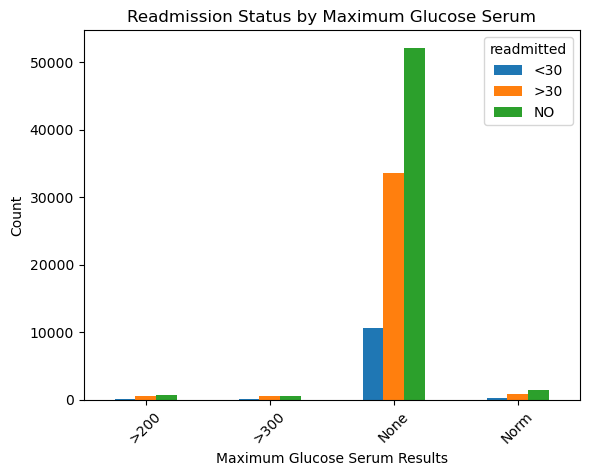

In [217]:
# Setup data for plotting
grouped_cols = df.groupby(['max_glu_serum', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Maximum Glucose Serum Results')
plt.ylabel('Count')
plt.title('Readmission Status by Maximum Glucose Serum')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot is showing max glucose serum results (for `>200` and `>300`, the assumed units are (mg/dL)) and readmittance status. It seems most people were not given a glucose test when they were admitted. Let's take a closer look at the other values below.

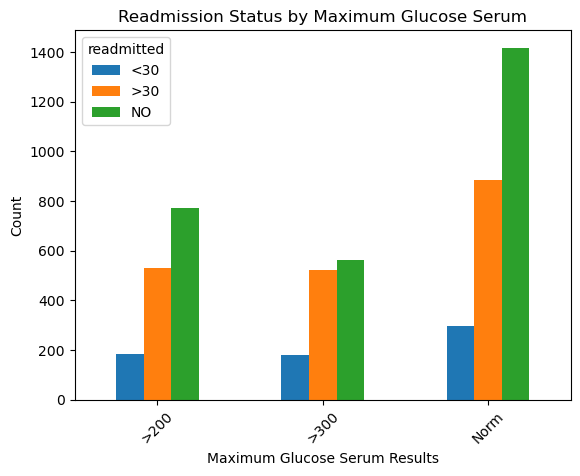

In [218]:
# Filter out 'None' in 'max_glu_serum'
df_filtered = df[df['max_glu_serum'] != 'None']

# Setup data for plotting
grouped_cols = df_filtered.groupby(['max_glu_serum', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Maximum Glucose Serum Results')
plt.ylabel('Count')
plt.title('Readmission Status by Maximum Glucose Serum')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Same graph as before but without the `None` value. It seems the proportion of patients who were readmitted are a bit higher for Max Glucose Serum results above 300 (mg/dL) compared to the other results. 

#### A1C Result and Readmittance

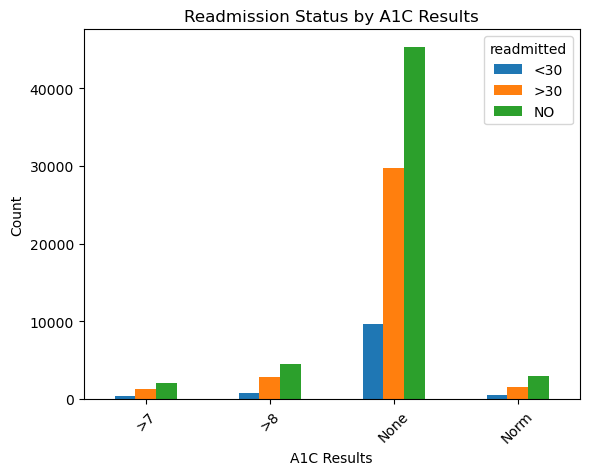

In [219]:
# Setup data for plotting
grouped_cols = df.groupby(['A1Cresult', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('A1C Results')
plt.ylabel('Count')
plt.title('Readmission Status by A1C Results')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Similar to the plot for Max Glucose Serum, most people admitted did not get a A1C test. Let's take a closer look without `None`.

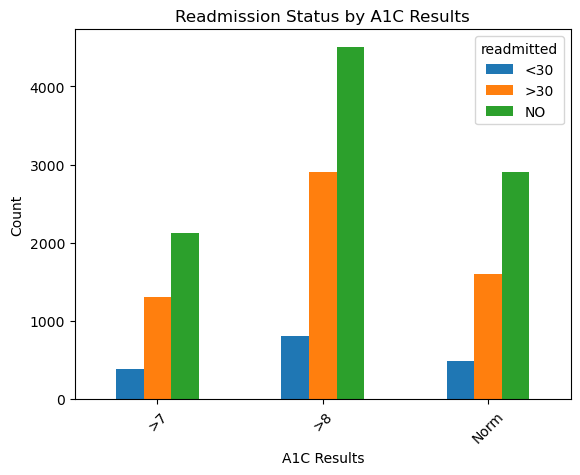

In [220]:
# Filter out 'None' in 'max_glu_serum'
df_filtered = df[df['A1Cresult'] != 'None']

# Setup data for plotting
grouped_cols = df_filtered.groupby(['A1Cresult', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('A1C Results')
plt.ylabel('Count')
plt.title('Readmission Status by A1C Results')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Unlike the the Max Glucose Serum results, there is not too much difference in proportions for people who were readmitted and not.

#### Drug and Readmittance 

There are 23 different drugs that were used for patients that were admitted due to diabetes. We can take a look at all of them together. 

As a reminder: 
- The feature indicates whether the drug was prescribed or there was a change in the dosage.
- **up** if the dosage was increased during the encounter
- **down** if the dosage was decreased
- **steady** if the dosage did not change
- **no** if the drug was not prescribed

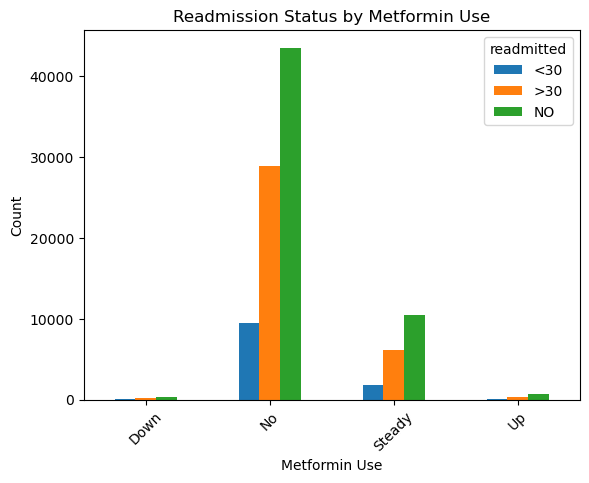

<Figure size 640x480 with 0 Axes>

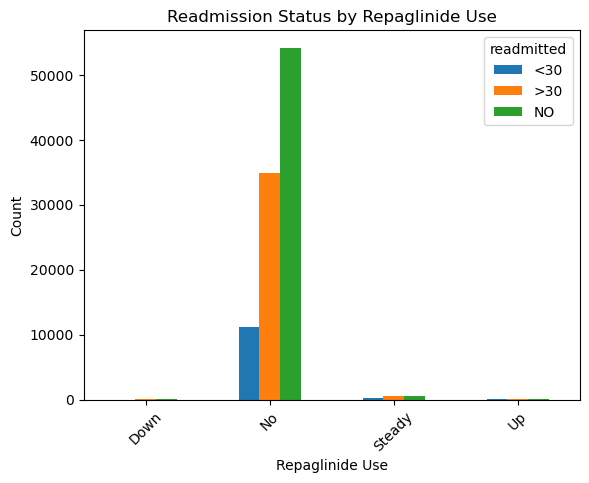

<Figure size 640x480 with 0 Axes>

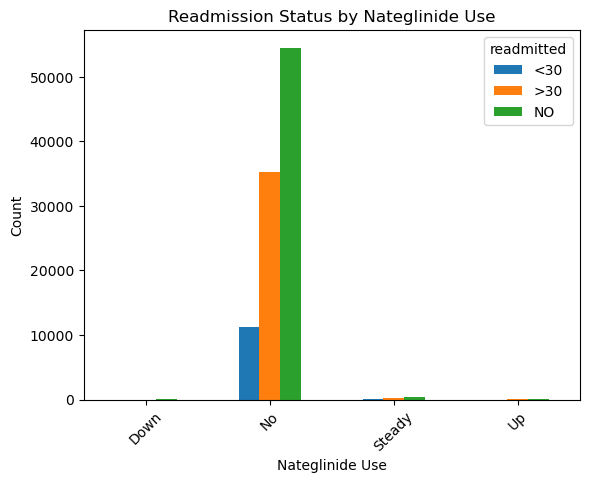

<Figure size 640x480 with 0 Axes>

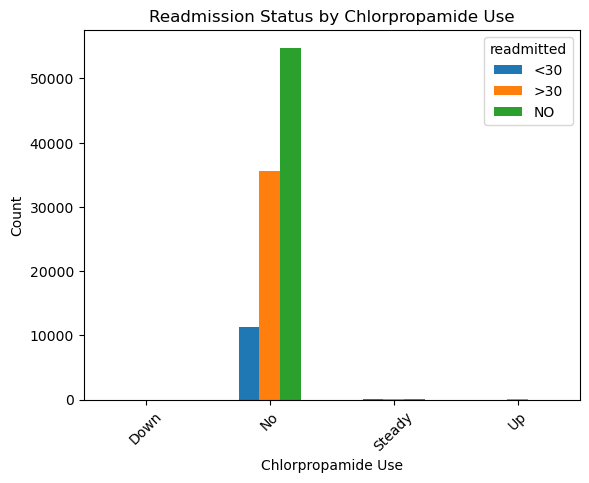

<Figure size 640x480 with 0 Axes>

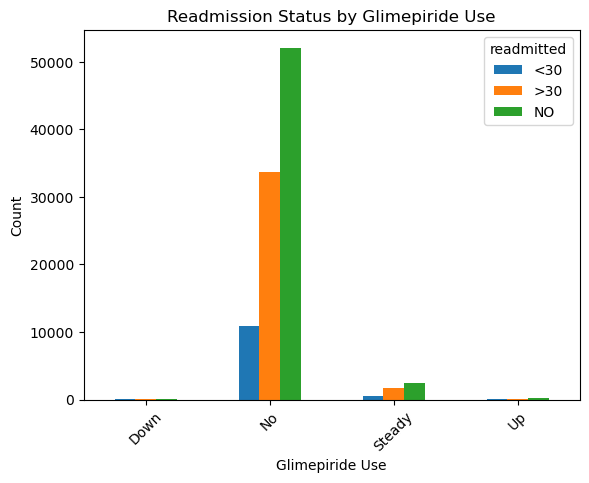

<Figure size 640x480 with 0 Axes>

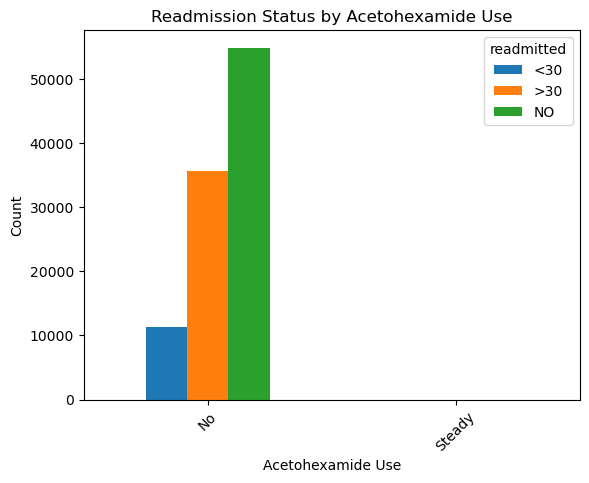

<Figure size 640x480 with 0 Axes>

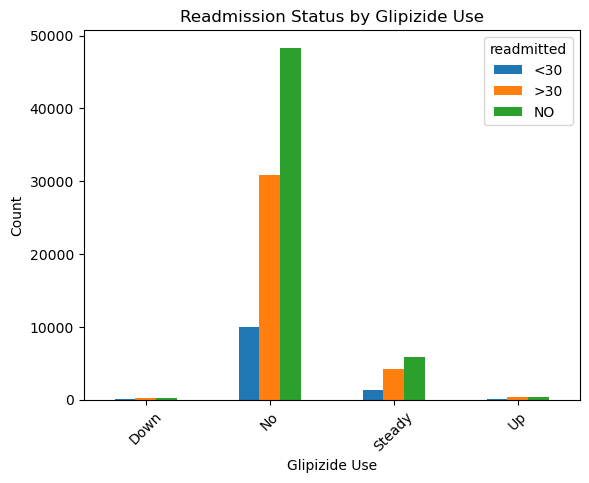

<Figure size 640x480 with 0 Axes>

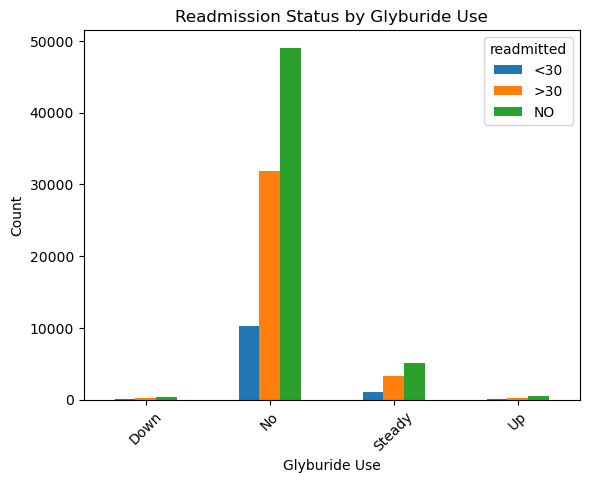

<Figure size 640x480 with 0 Axes>

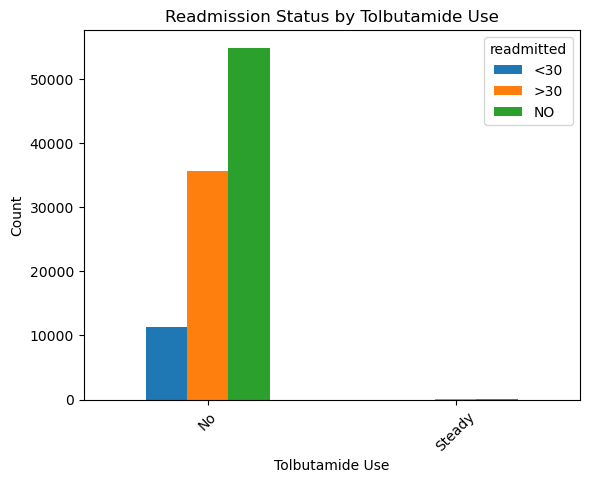

<Figure size 640x480 with 0 Axes>

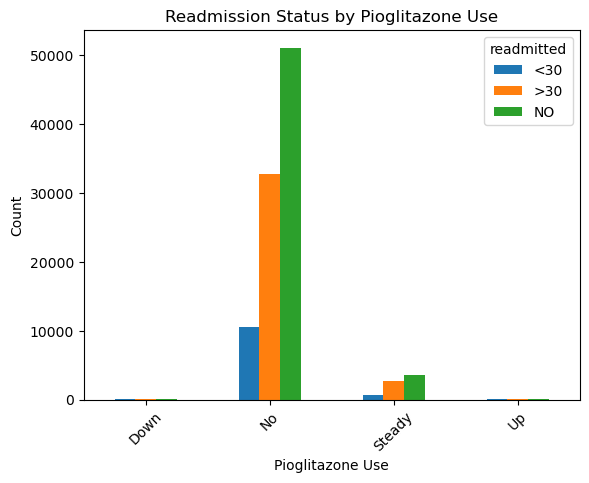

<Figure size 640x480 with 0 Axes>

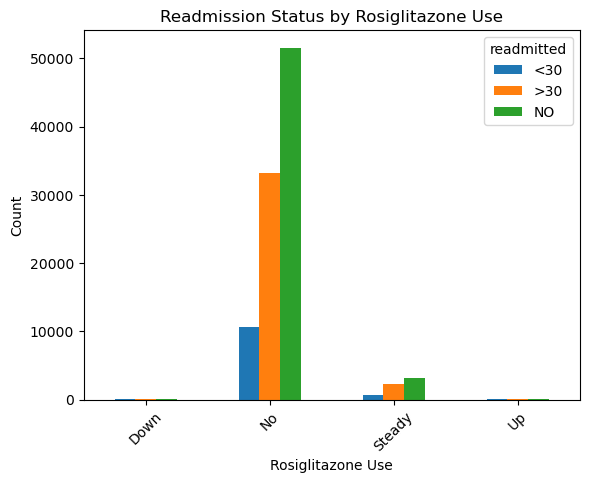

<Figure size 640x480 with 0 Axes>

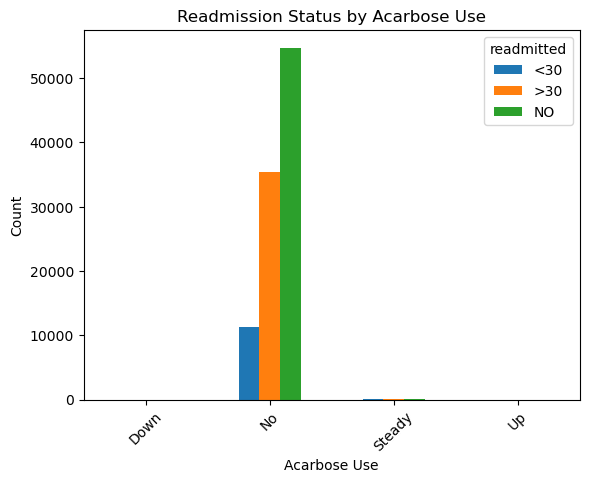

<Figure size 640x480 with 0 Axes>

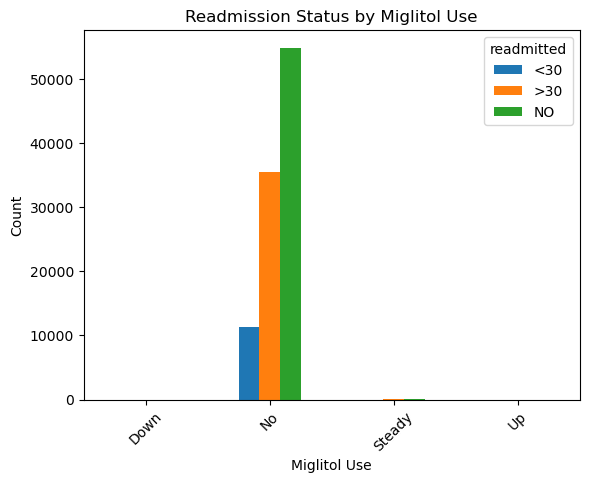

<Figure size 640x480 with 0 Axes>

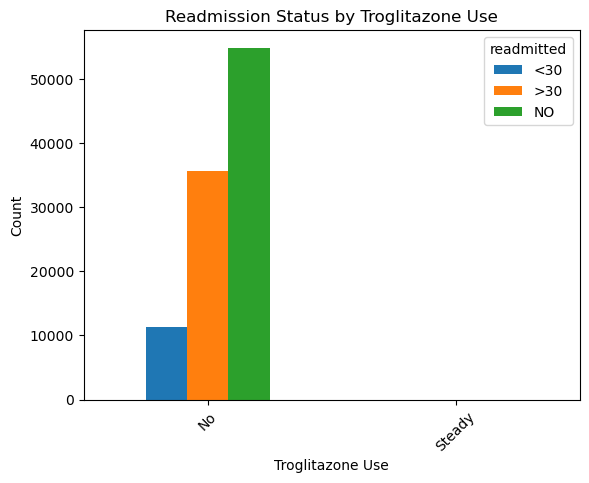

<Figure size 640x480 with 0 Axes>

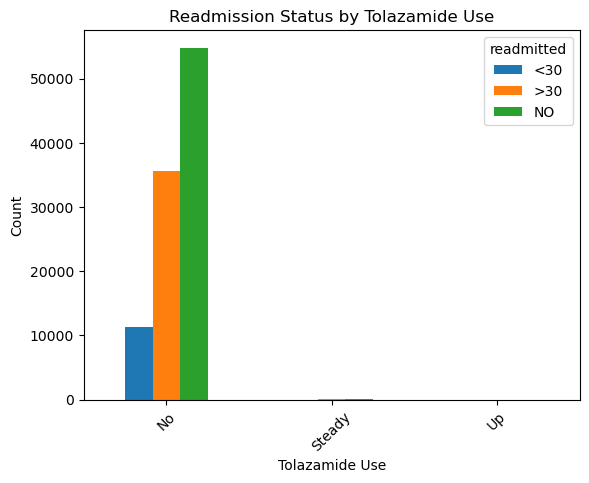

<Figure size 640x480 with 0 Axes>

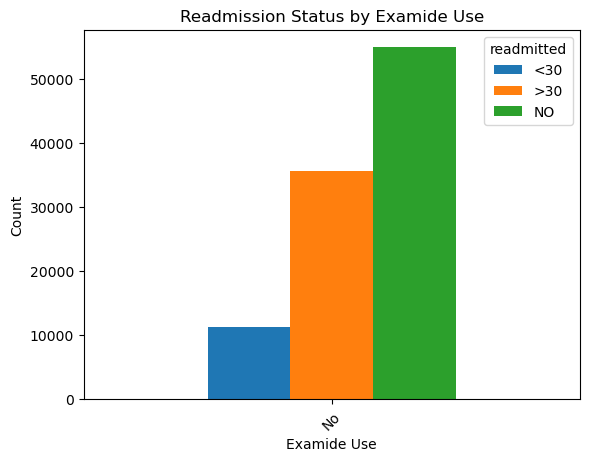

<Figure size 640x480 with 0 Axes>

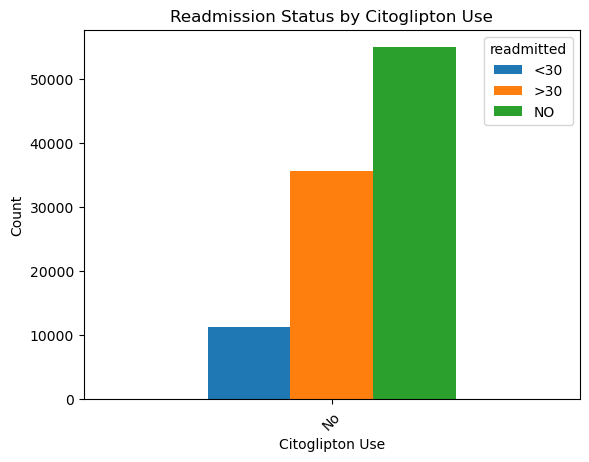

<Figure size 640x480 with 0 Axes>

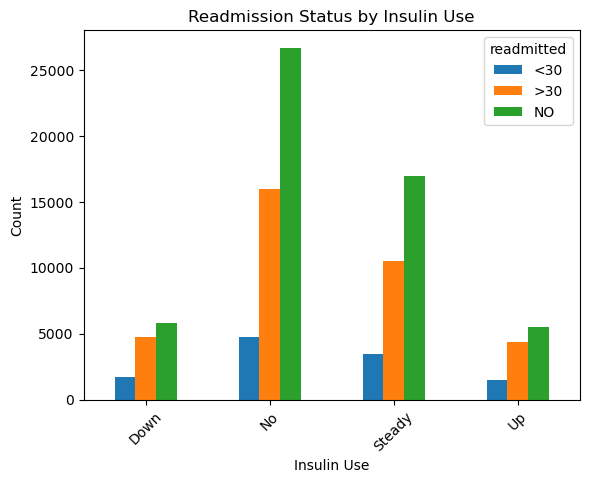

<Figure size 640x480 with 0 Axes>

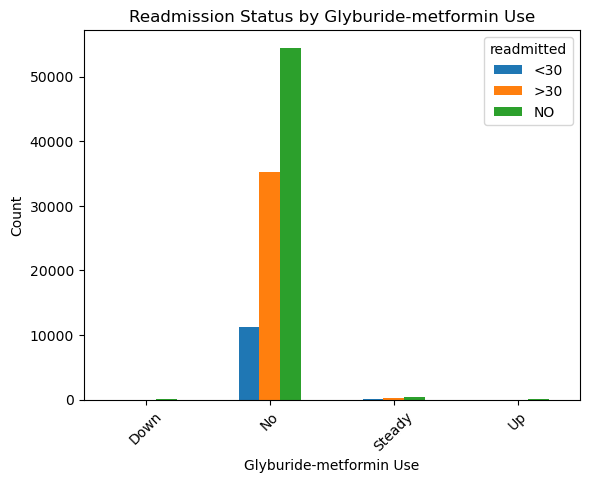

<Figure size 640x480 with 0 Axes>

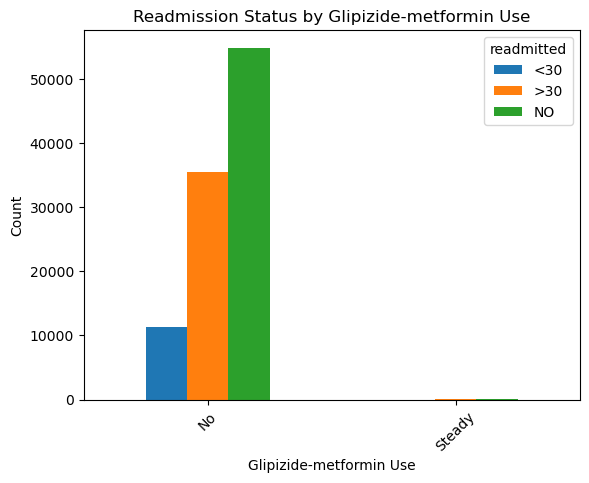

<Figure size 640x480 with 0 Axes>

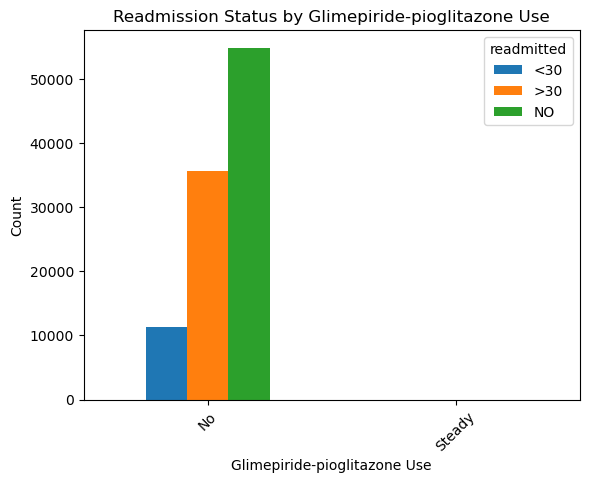

<Figure size 640x480 with 0 Axes>

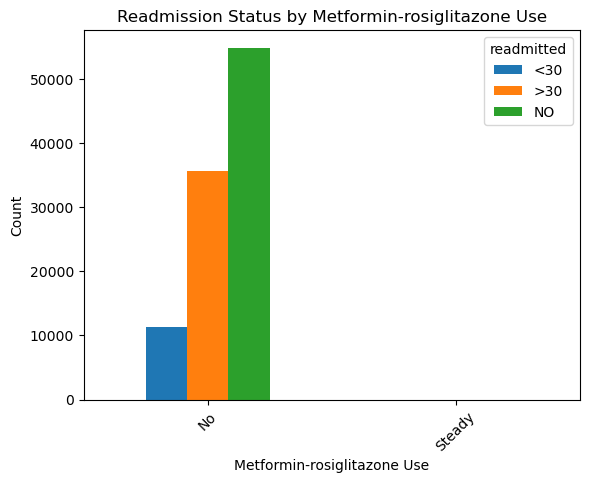

<Figure size 640x480 with 0 Axes>

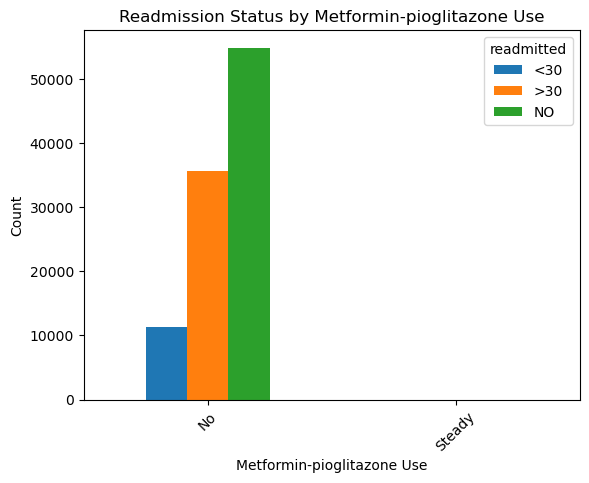

<Figure size 640x480 with 0 Axes>

In [221]:
def plot_graph(column):
    # Setup data for plotting
    grouped_cols = df.groupby([column, 'readmitted']).size().unstack()
    # Plot the grouped bar plot
    grouped_cols.plot(kind='bar', stacked=False)

    # Add labels and title
    plt.xlabel(column.capitalize() + ' Use')
    plt.ylabel('Count')
    plt.title('Readmission Status by ' + column.capitalize() + ' Use')

    # Set the x-axis ticks
    # x_ticks = range(0, 300, 50)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
    plt.clf()

drug_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
             'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for drug in drug_list:
    plot_graph(drug)

A lot to go through here. Most people were not prescribed drugs during their admittance with `Insulin` being the most common drug used. Like before, we will take a closer look at the low values by removing **No** values. We also removed `examide` and `citoglipton` from the new plots since those drugs were never prescribed.

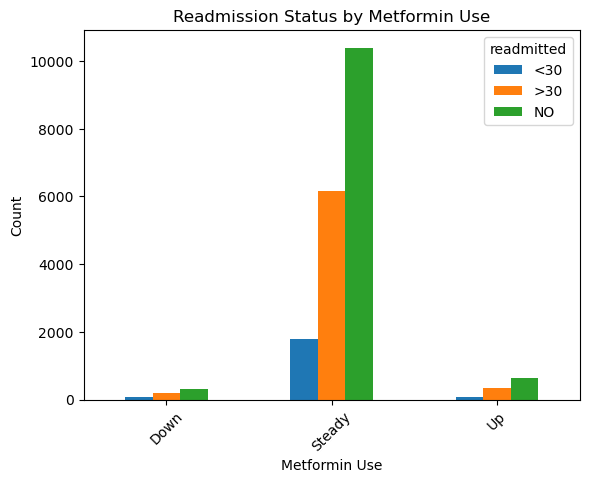

<Figure size 640x480 with 0 Axes>

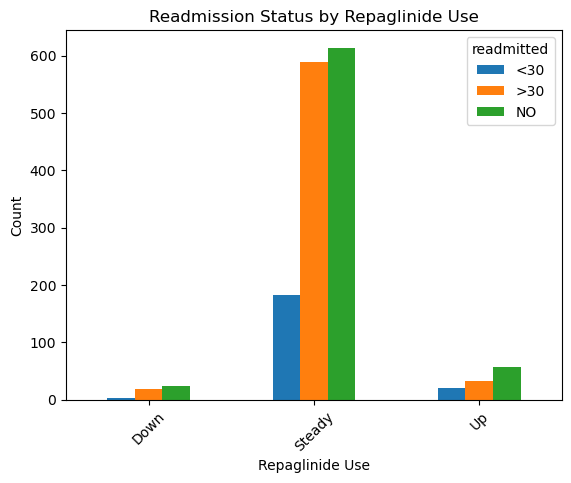

<Figure size 640x480 with 0 Axes>

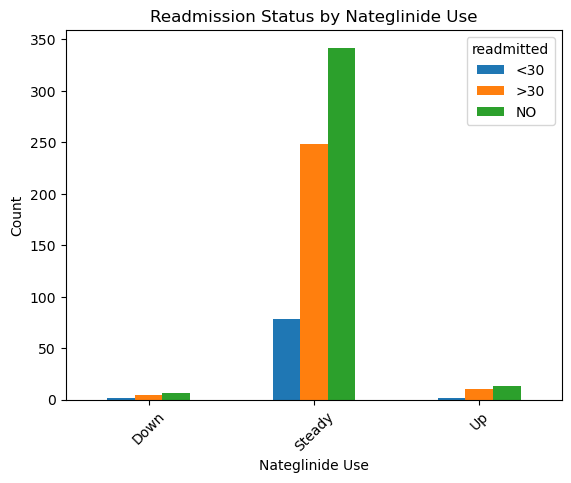

<Figure size 640x480 with 0 Axes>

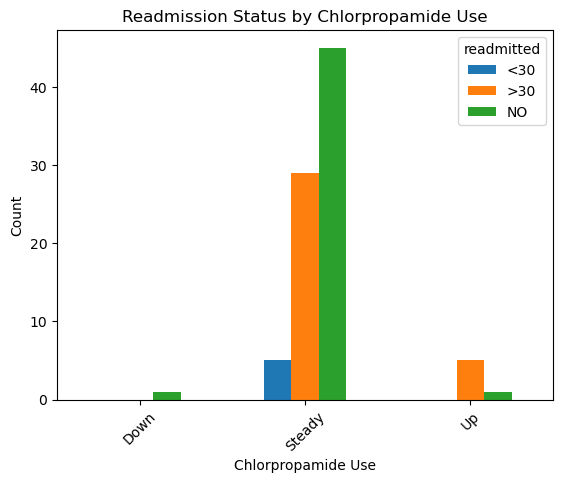

<Figure size 640x480 with 0 Axes>

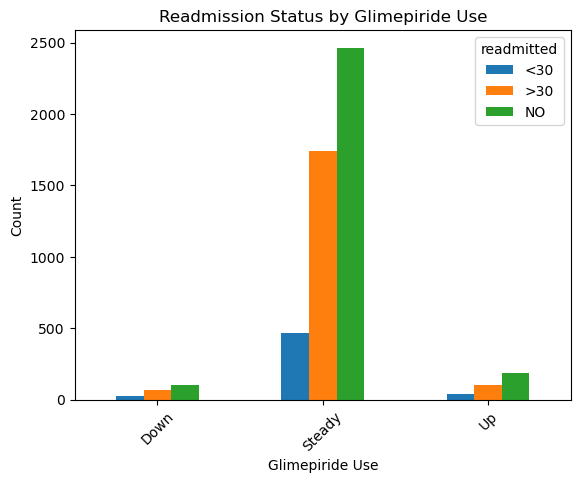

<Figure size 640x480 with 0 Axes>

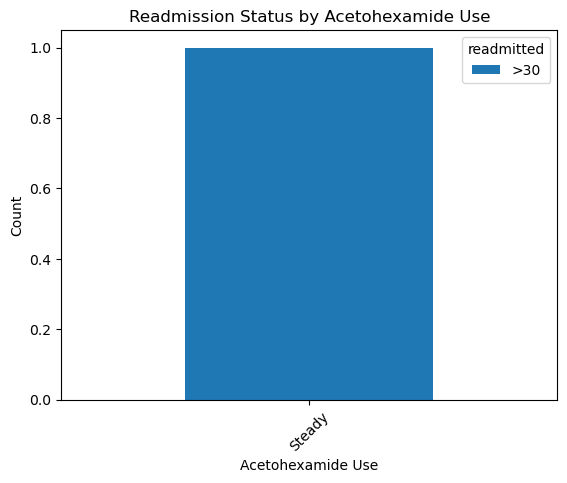

<Figure size 640x480 with 0 Axes>

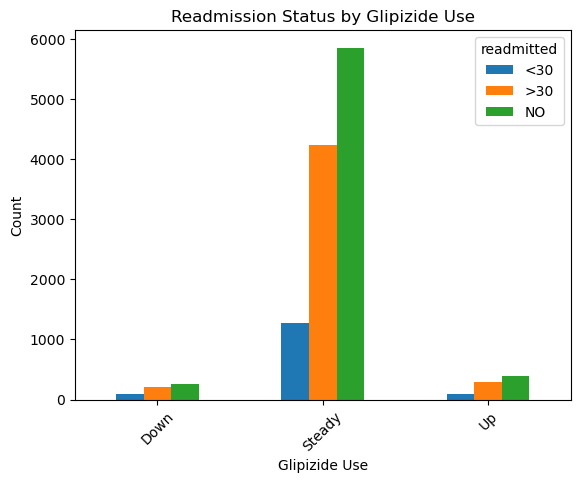

<Figure size 640x480 with 0 Axes>

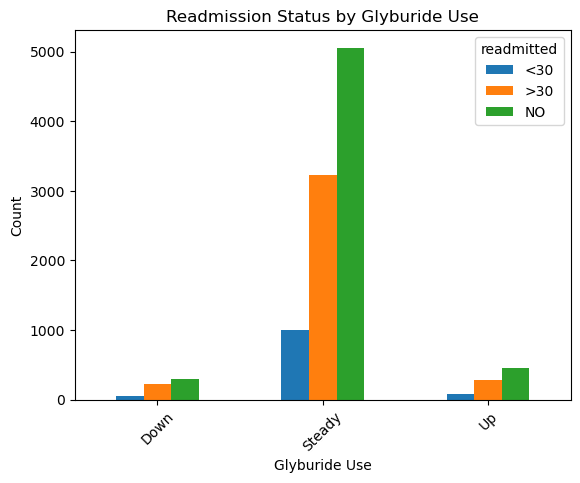

<Figure size 640x480 with 0 Axes>

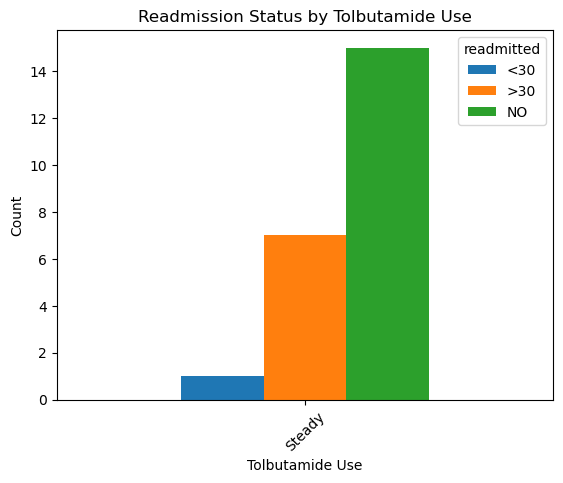

<Figure size 640x480 with 0 Axes>

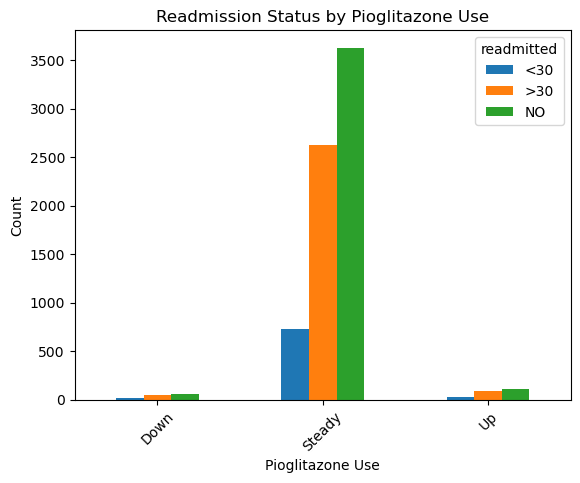

<Figure size 640x480 with 0 Axes>

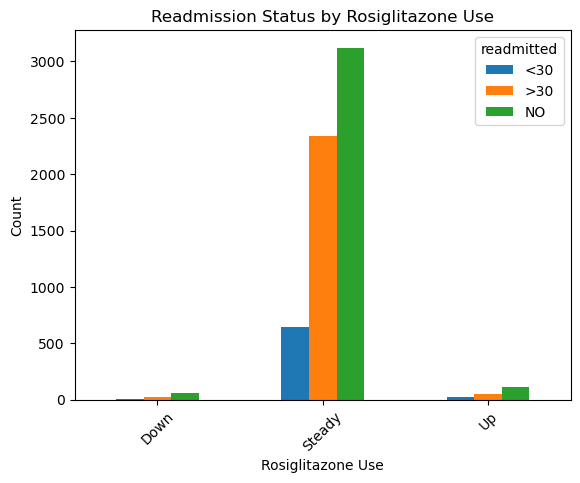

<Figure size 640x480 with 0 Axes>

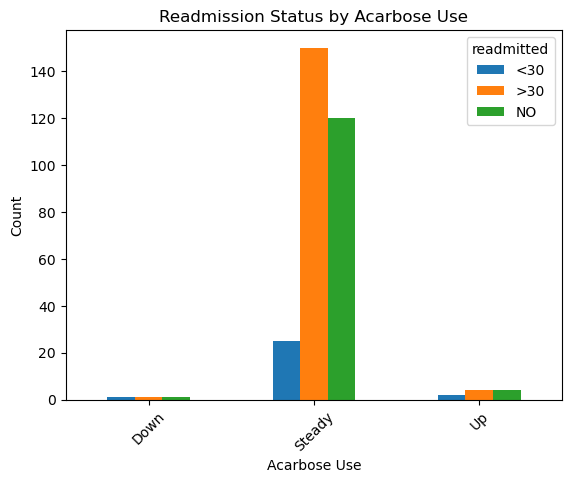

<Figure size 640x480 with 0 Axes>

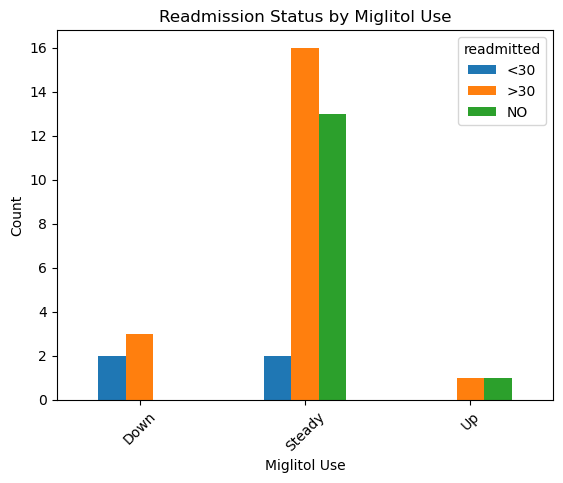

<Figure size 640x480 with 0 Axes>

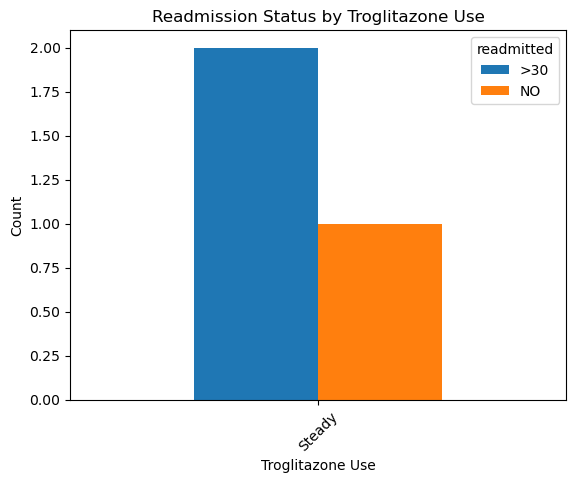

<Figure size 640x480 with 0 Axes>

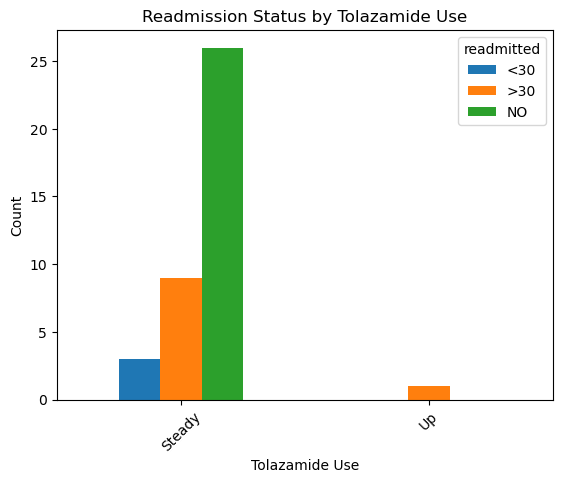

<Figure size 640x480 with 0 Axes>

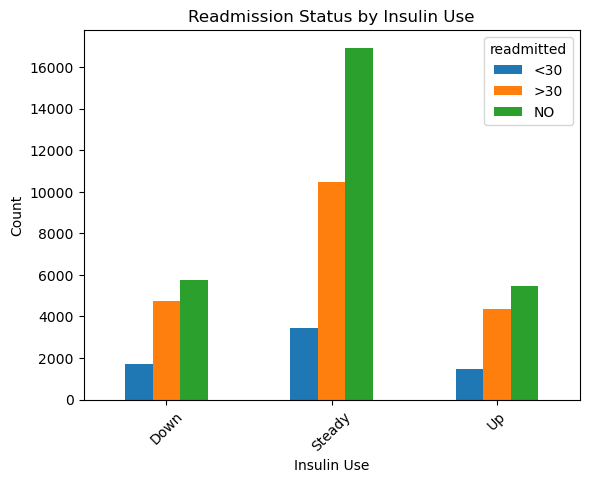

<Figure size 640x480 with 0 Axes>

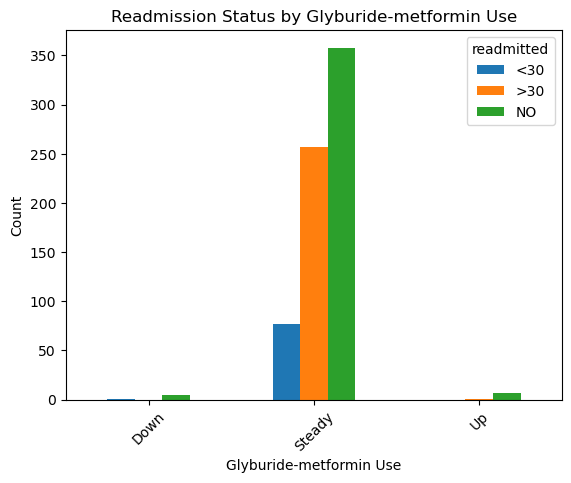

<Figure size 640x480 with 0 Axes>

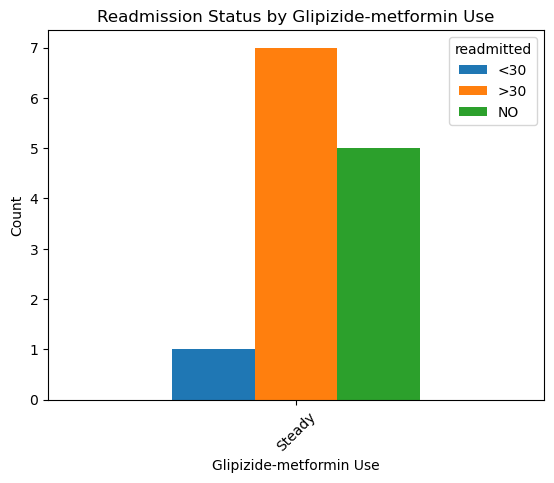

<Figure size 640x480 with 0 Axes>

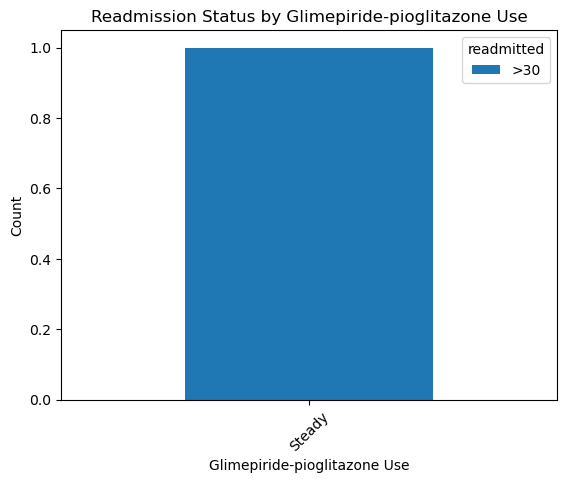

<Figure size 640x480 with 0 Axes>

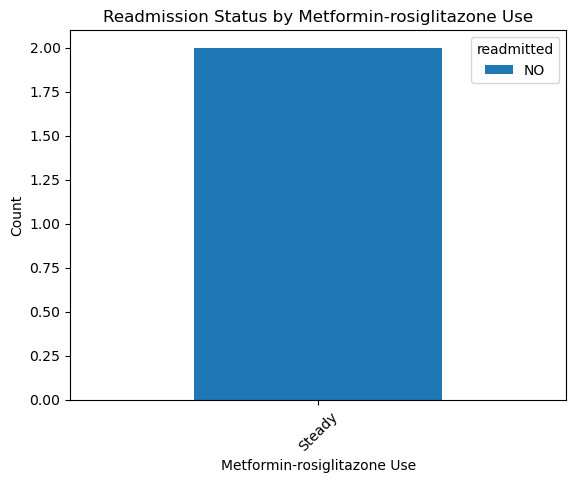

<Figure size 640x480 with 0 Axes>

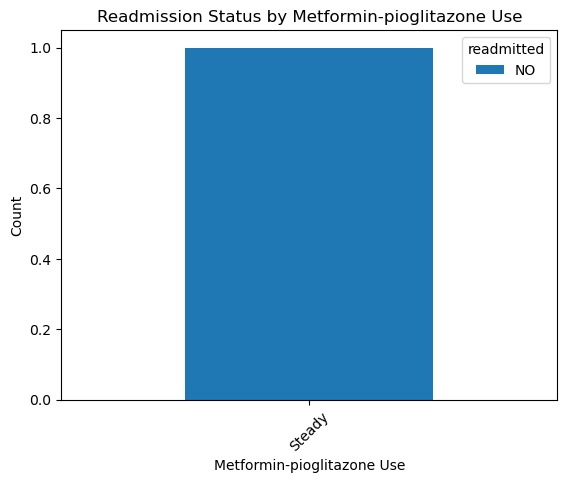

<Figure size 640x480 with 0 Axes>

In [222]:
def plot_graph_2(column):
    # Filter out 'No'
    df_filtered = df[df[column] != 'No']
    # Setup data for plotting
    grouped_cols = df_filtered.groupby([column, 'readmitted']).size().unstack()
    # Plot the grouped bar plot
    grouped_cols.plot(kind='bar', stacked=False)

    # Add labels and title
    plt.xlabel(column.capitalize() + ' Use')
    plt.ylabel('Count')
    plt.title('Readmission Status by ' + column.capitalize() + ' Use')

    # Set the x-axis ticks
    # x_ticks = range(0, 300, 50)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
    plt.clf()

drug_list_2 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
             'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for drug in drug_list_2:
    plot_graph_2(drug)

A lot to go through again. Some stuff we can quickly see are features we can exclude from the machine learning model due to lack of data (~1-10 data points). There are others that don't have as much data (~100-1000) and may need additional feature selection techniques to justify keeping them.

For `insulin`, it seems whenever dosage was changed **up** or **down** when it was administered, the proportional of readmittance for patients increased. There are a few drugs that show this even with a steady dosage. We will determine the weight of these features later in the feature selection portion.

#### Change in Diabetic Medication and Readmittance

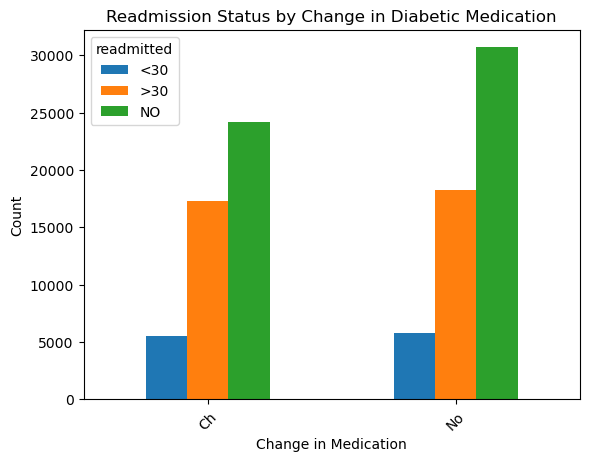

In [223]:
# Setup data for plotting
grouped_cols = df.groupby(['change', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Change in Medication')
plt.ylabel('Count')
plt.title('Readmission Status by Change in Diabetic Medication')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot shows if admitted patients had a change (`Ch`) to their diabetic medication or not (`No`). It looks like the proportion of readmittance is slightly different when patients get a change to their medication.

#### Diabetes Medication and Readmittance

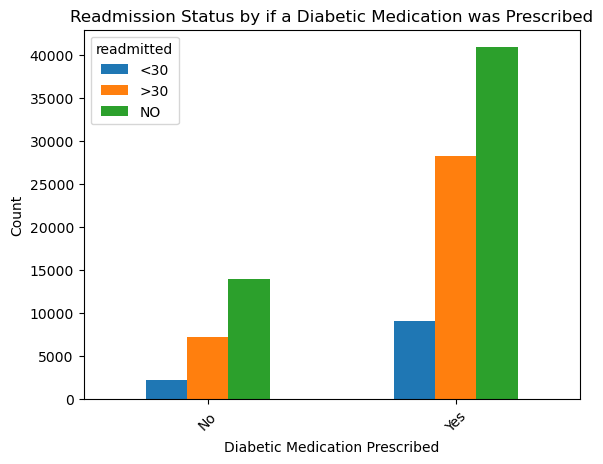

In [224]:
# Setup data for plotting
grouped_cols = df.groupby(['diabetesMed', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Diabetic Medication Prescribed')
plt.ylabel('Count')
plt.title('Readmission Status by if a Diabetic Medication was Prescribed')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

The title for the above plot is pretty explanatory. More people were prescribed diabetic medication when then not, which seems reasonable for a diabetic encounter. The proportion of readmittance seems slightly higher for patients that were prescribed diabetic medication.

## Feature Selection

There are 48 features, not including `readmittance`, to be selected from. We are going to go through and determine which ones are useful for the model.

In [225]:
removed_features = ['encounter_id', 'patient_nbr', 'weight', 'examide', 'citoglipton', 
                    'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']

not_sure_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                     'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

Let's start with the `removed_features` list. We can first take out **encounter_id** and **patient_nbr** since these are unique for the patients. The rest of the features in `removed_features` list are due to low amount of data. During the data exploration section, some of the features we explored had low amounts of data points for certain values (even as low as **1**). We can safely remove these since they will offer little insight on `readmittance`.

Looking at `not_sure_features` list, some of these features have large amount of unique values (~700+). Another thing to consider is domain knowledge on these features. For example, `admission_type_id` has distinct values of **emergency** and **urgent**. Let's also look at a graph of it.

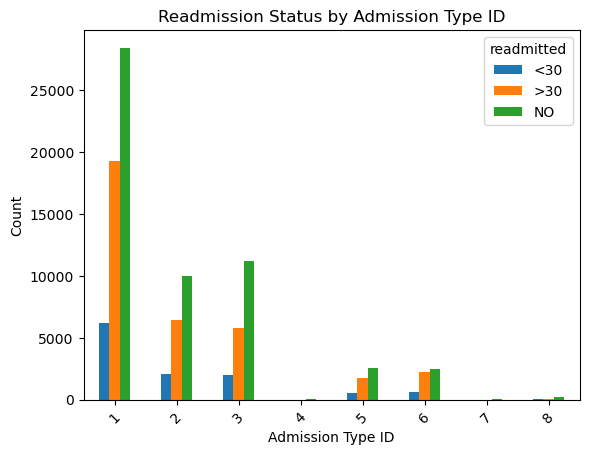

In [226]:
# Setup data for plotting
grouped_cols = df.groupby(['admission_type_id', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Readmission Status by Admission Type ID')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder, these are the **admission_type_id** identifiers.

**admission_type_id**:
  - 1: Emergency
  - 2: Urgent
  - 3: Elective
  - 4: Newborn
  - 5: Not Available
  - 6: NULL
  - 7: Trauma Center
  - 8: Not Mapped

It's hard to say if these labels would affect `readmittance` considering the nature of the data. This problem occurs in some of the other features in `not_sure_features`. Will these features significantly affect `readmittance`? `discharge_disposition_id` has a value **expired** that would change readmittance status, but would the way you pay (`payer_code`) or the department that treated you (`medical_specialty`) change the outcome? Here is where machine learning will help.

### Feature Elimination

There are high cardinality categorical features (features with a lot of unique values) and a mix of integers and categorical. We need to do a little more preprocessing in order to fit a model.

In [227]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


`diag_1`, `diag_2`, and `diag_3` have a mix of integers and strings that mess with the standardization for the machine learning model. Let's see what we can do.

In [228]:
diag_1 = df.diag_1.unique()
print(sorted(diag_1))

['10', '11', '110', '112', '114', '115', '117', '131', '133', '135', '136', '141', '142', '143', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '160', '161', '162', '163', '164', '170', '171', '172', '173', '174', '175', '179', '180', '182', '183', '184', '185', '187', '188', '189', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '207', '208', '210', '211', '212', '214', '215', '216', '217', '218', '219', '220', '223', '225', '226', '227', '228', '229', '23', '230', '233', '235', '236', '237', '238', '239', '240', '241', '242', '244', '245', '246', '250', '250.01', '250.02', '250.03', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.23', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93', '251', '2

In [229]:
diag_2 = df.diag_2.unique()
print(sorted(diag_2))

['11', '110', '111', '112', '114', '115', '117', '123', '130', '131', '135', '136', '137', '138', '140', '141', '145', '150', '151', '152', '153', '154', '155', '156', '157', '162', '163', '164', '171', '172', '173', '174', '179', '180', '182', '183', '185', '186', '188', '189', '191', '192', '193', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '208', '211', '212', '214', '215', '217', '218', '220', '223', '225', '226', '227', '228', '232', '233', '235', '238', '239', '240', '241', '242', '244', '245', '246', '250', '250.01', '250.02', '250.03', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.23', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93', '251', '252', '253', '255', '256', '258', '259', '260', '261', '262', '263', '266', '268', '269', '27', '270', '271', '272', '

In [230]:
diag_3 = df.diag_3.unique()
print(sorted(diag_3))

['11', '110', '111', '112', '115', '117', '122', '123', '131', '132', '135', '136', '138', '139', '14', '141', '146', '148', '150', '151', '152', '153', '154', '155', '156', '157', '158', '161', '162', '163', '164', '17', '170', '171', '172', '173', '174', '175', '179', '180', '182', '183', '185', '186', '188', '189', '191', '192', '193', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '208', '211', '214', '215', '216', '217', '218', '220', '223', '225', '226', '227', '228', '230', '233', '235', '236', '238', '239', '240', '241', '242', '243', '244', '245', '246', '250', '250.01', '250.02', '250.03', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.23', '250.3', '250.31', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93', '251', '252', '253', '255', '256', '258', '259', '260', '261', '262', '263', '265', '266', '

In [231]:
# Change the values such as E909, V07, and ? to integer values
df['diag_1'] = df['diag_1'].str.replace('E', '1', regex=False)
df['diag_2'] = df['diag_2'].str.replace('E', '1', regex=False)
df['diag_3'] = df['diag_3'].str.replace('E', '1', regex=False)

df['diag_1'] = df['diag_1'].str.replace('V', '20', regex=False)
df['diag_2'] = df['diag_2'].str.replace('V', '20', regex=False)
df['diag_3'] = df['diag_3'].str.replace('V', '20', regex=False)

df['diag_1'] = df['diag_1'].str.replace('?', '0', regex=False)
df['diag_2'] = df['diag_2'].str.replace('?', '0', regex=False)
df['diag_3'] = df['diag_3'].str.replace('?', '0', regex=False)

In [232]:
# Fix mixed column data
df['diag_1'] = df['diag_1'].astype('float64')
df['diag_2'] = df['diag_2'].astype('float64')
df['diag_3'] = df['diag_3'].astype('float64')

In [233]:
removed_features = ['encounter_id', 'patient_nbr', 'weight', 'examide', 'citoglipton', 
                    'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone', 
                    'diag_1', 'diag_2', 'diag_3']

cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'readmitted']

print('Amount of initial features:', len(cols))

# Separate target variable from features
feature_df = df[cols].dropna()
feature_df.shape

# target = df['readmitted']

print(feature_df.columns)

Amount of initial features: 33
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


When dealing with a mix of integer and categorical columns, it's important to preprocess the data appropriately before applying machine learning algorithms like k-Nearest Neighbors (k-NN).

1. Identify the numeric and categorical columns in the dataset.
2. Standardize the numeric columns using StandardScaler to have a mean of 0 and a standard deviation of 1. This ensures that numeric features are on a similar scale, which is important for distance-based algorithms like k-NN.
3. Encode the categorical columns using techniques such as one-hot encoding or label encoding, depending on the nature of the categorical data. One-hot encoding is generally preferred for nominal categorical data, while label encoding can be used for ordinal categorical data.
4. Concatenate the standardized numeric columns and the encoded categorical columns to form the final feature matrix.

In [234]:
# Identify numeric and categorical columns
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
numeric_features_df = feature_df[numeric_features]
categorical_features = list(set(cols) - set(numeric_features))

print(numeric_features)
print(categorical_features)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['insulin', 'rosiglitazone', 'change', 'chlorpropamide', 'medical_specialty', 'diabetesMed', 'repaglinide', 'metformin', 'race', 'admission_source_id', 'acarbose', 'payer_code', 'glyburide-metformin', 'nateglinide', 'glipizide', 'discharge_disposition_id', 'glimepiride', 'age', 'max_glu_serum', 'admission_type_id', 'pioglitazone', 'glyburide', 'readmitted', 'gender', 'A1Cresult']


In [235]:
from sklearn.preprocessing import StandardScaler

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
feature_df[numeric_features_df.columns] = sc.fit_transform(numeric_features_df)

# convert string variable to One Hot Encoding
for col in cols[:-1]:
    feature_df = pd.get_dummies(feature_df, columns=[col], prefix = [col])

In [236]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = feature_df.iloc[:, 1:col_length]
y = feature_df.iloc[:, 0:1]

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state = 0)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

In [237]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Preprocessing steps for numeric columns
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing steps for categorical columns
# categorical_transformer = Pipeline(steps=[
#     ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Use drop='first' to avoid dummy variable trap
# ])

# # Apply column transformations to the appropriate columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [238]:
# # Separate the data into feature and target
# X = feature_df
# y = target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

# # Combine the training and test datasets
# X_combined = pd.concat([X_train, X_test], axis=0)
# y_combined  = pd.concat([y_train, y_test], axis=0)

# # Preprocess the combined dataset
# X_combined_processed = preprocessor.fit_transform(X_combined)

# # Split the combined dataset back into training and test datasets
# X_train_2, X_test_2, y_train, y_test = train_test_split(X_combined_processed, y_combined, test_size=0.25, random_state=13)

# # Transform the testing data using the fitted preprocessor
# X_test_processed = preprocessor.transform(X_test_2)

#### Chi-Squared and SelectKBest

We are gonna focus

In [239]:
# # Separate the data into feature and target
# X = feature_df
# y = target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# # Fit the preprocessing steps and transform the training data
# X_train_processed = preprocessor.fit_transform(X_train)

# # Transform the testing data using the fitted preprocessor
# X_test_processed = preprocessor.transform(X_test)

In [240]:
# # Get the encoder from the preprocessor
# encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']

# # Get the list of feature names after preprocessing
# numeric_feature_names = numeric_features
# categorical_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# # Print the lengths of numeric and categorical feature names
# print("Numeric feature names length:", len(numeric_feature_names))
# print("Categorical feature names length:", len(categorical_feature_names))

# # Combine numeric and categorical processed data
# X_train_processed_df = pd.DataFrame(X_train_processed, columns=numeric_feature_names + categorical_feature_names)

# # Print the columns
# print(X_train_processed_df.columns)

In [241]:
# # Assuming X_train_processed is a NumPy array with multiple columns
# X_train_processed_df = pd.DataFrame(X_train_processed, columns=X.columns)

# # Print data types of columns
# print("Data Types of Columns:")
# print(X_train_processed_df.dtypes)

# # Check for missing or NaN values
# print("\nMissing Values in X_train_processed:")
# print(X_train_processed_df.isnull().sum())

# # Check for NaN values specifically (useful for numerical features)
# print("\nNaN Values in X_train_processed:")
# print(X_train_processed_df.isna().sum())

# # If you want to check for NaN values in categorical features, use this
# print("\nNaN Values in Categorical Features:")
# categorical_features = categorical_transformer.named_steps['encoder'].get_feature_names_out(input_features=categorical_features)
# print(X_train_processed_df[categorical_features].isna().sum())

In [242]:
# # Assuming 'data' is your DataFrame
# has_negatives = (df[categorical_features] < 0).any().any()

# if has_negatives:
#     print("The DataFrame contains negative values.")
# else:
#     print("The DataFrame does not contain negative values.")

In [243]:
from sklearn.feature_selection import SelectKBest, chi2

# Create the SelectKBest object with the chi2 scoring function
k_best_selector = SelectKBest(score_func=chi2, k='all')  # Set k to 'all' to keep all features

# Fit the selector on the training data and target
k_best_selector.fit(X_train, y_train)

# Get the feature scores and p-values
feature_scores = k_best_selector.scores_
p_values = k_best_selector.pvalues_

# Print or inspect the scores and p-values to select the relevant features
print("Feature Scores:", feature_scores)
print("P-Values:", p_values)

Feature Scores: [1.61481460e+02 1.32940129e+00 2.64817219e+01 1.63118362e+01
 9.91630364e+00 2.01590105e+01 1.46870213e+01 1.69441774e+01
 2.56764766e+00 4.14524056e+01 2.23562980e+01 1.48505232e+01
 1.68067805e+01 1.23776564e+01 4.45682687e+01 2.71969702e-01
 4.21229103e+01 2.90689190e+01 2.92753385e+01 2.21924806e+01
 1.19244682e+00 1.73614048e+02 6.88580598e-01 4.36482449e+00
 1.04047520e+02 1.45500034e+01 1.10341714e+01 1.65024400e+02
 4.40758250e+01 1.59738050e+02 2.03112441e+00 9.35090594e+01
 2.89173942e+02 7.27133104e+00 2.15935162e-01 1.44024176e+01
 1.63935798e+00 1.11007967e+03 9.52618931e+00 1.36437321e+02
 1.71093423e+02 5.25591257e+01 2.25405655e+00 1.71630098e+00
 6.64688180e+01 5.99117788e+00 1.71176511e+00 4.06458495e+02
 6.01800100e+00]
P-Values: [8.60491301e-036 5.14427500e-001 1.77650797e-006 2.87031648e-004
 7.02590097e-003 4.19301565e-005 6.46775917e-004 2.09227431e-004
 2.76976163e-001 9.97067363e-010 1.39762796e-005 5.96004934e-004
 2.24106261e-004 2.05223011e-0

In [245]:
# # Separate the data into feature and target
# X = feature_df
# y = target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# # Fit the preprocessing steps and transform the training data
# X_train_processed = preprocessor.fit_transform(X_train)

# # Transform the testing data using the fitted preprocessor
# X_test_processed = preprocessor.transform(X_test)

In [ ]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed

In [ ]:
def feature_selection_iteration(X_train, y_train, num_features_to_select):
    # Create a Random Forest classifier
    rf = RandomForestClassifier()

    # Fit RF on the training data
    rf.fit(X_train, y_train)

    # Get the feature importances
    feature_importances = rf.feature_importances_

    # Sort the feature importances and select the top 'num_features_to_select' indices
    selected_feature_indices = feature_importances.argsort()[::-1][:num_features_to_select]

    return selected_feature_indices

def parallel_feature_selection(X_train, y_train, num_iterations):
    # Create a list to store the selected feature indices for each iteration
    selected_features = []

    # Parallelize the feature selection loop
    with Parallel(n_jobs=-1, verbose=10) as parallel:
        selected_features = parallel(
            delayed(feature_selection_iteration)(X_train, y_train, num_features_to_select)
            for num_features_to_select in range(1, num_iterations + 1)
        )

    return selected_features

In [ ]:
# # Number of iterations for feature selection
# # Also number of features after one-hot encoding
# num_iterations = X_train_processed.shape[1]

# # Perform parallel feature selection
# selected_features = parallel_feature_selection(X_train_processed, y_train, num_iterations)

In [ ]:
# # Create a Random Forest classifier
# rf = RandomForestClassifier()

# # Fit RF on the training data
# with tqdm(total=X_train_processed.shape[1], desc='RF Progress') as pbar:
#     for i in range(1, X_train_processed.shape[1] + 1):
#         rf.n_features_to_select = i
#         rf.fit(X_train_processed, y_train)
#         pbar.update()  # Automatically updates the progress bar for each iteration

In [ ]:
# Get the number of features before one-hot encoding
num_original_features = len(numeric_features) + len(categorical_features)

# Print the selected features for each iteration
for i, features in enumerate(selected_features, 1):
    # Calculate the actual selected feature indices
    selected_indices = np.where(features)[0]
    # Only consider features within the original range of features
    selected_indices = selected_indices[selected_indices < num_original_features]
    print(f"Iteration {i}: Selected Features = {selected_indices}")

In [ ]:
# Get the feature importances
feature_importances = rf.feature_importances_

# Print or analyze the feature importances
print(feature_importances)